# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide
1. Importa los datos 'df_furniture.csv'
2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Cargamos los datos

In [148]:
df = pd.read_csv('data/df_furniture.csv')
df.head()

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     326 non-null    object 
 1   furniture_price_adjusted  331 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


In [150]:
df.describe()

,furniture_price_adjusted
count,331.000000
mean,5975.765787
std,2092.867819
min,2073.432724
25%,4280.088499
50%,6075.405272
75%,7381.403461
max,10833.501852


## 2. Tratar la fecha como texto y parsear

In [151]:
df[df['Month'].isna()]

,Month,furniture_price_adjusted
15,NaN,2457.704334
21,NaN,2715.938414
39,NaN,2857.008678
40,NaN,3086.648631
60,NaN,3298.628987


In [152]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     326 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


## 3. ¿De qué fecha a qué fecha va el histórico?

La serie va desde enero de 1992 a julio de 2019

In [153]:
print(df['Month'].min())
print(df['Month'].max())


1992-01-01 00:00:00
2019-07-01 00:00:00


In [154]:
dates = pd.date_range(df['Month'].min(), df['Month'].max(), freq="MS")
dates

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01'],
              dtype='datetime64[ns]', length=331, freq='MS')

In [155]:
df['Month'] = dates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     331 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


In [156]:
df.index = df['Month']

In [157]:
df.drop(['Month'], axis=1, inplace=True)

## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

Se ve que tiene una clara tendencia al alza, a pesar de una pequeña bajada en als acciones en el 2007.

También apreciamos estacionalidad, al cumplirse cierto patrón a lo largo del tiempo

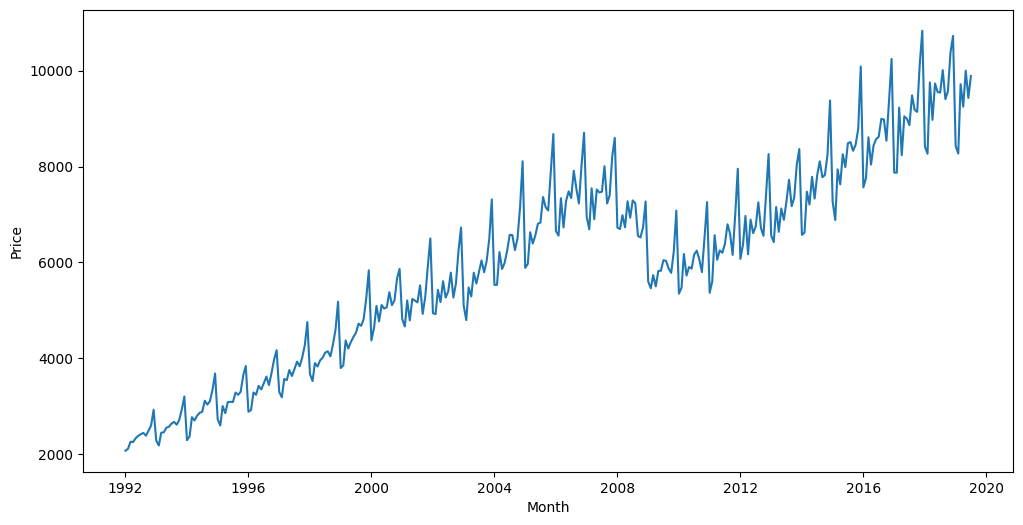

In [158]:
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.xlabel('Month')
plt.ylabel('Price');

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

In [159]:
from statsmodels.tsa.stattools import adfuller

adfuller = adfuller(df['furniture_price_adjusted'].values)
adfuller[1]

0.7035529748089993

## 6. ¿Conoces algún método para representar mejor la tendencia?

In [160]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_descompose = seasonal_decompose(df['furniture_price_adjusted'],
                                         model='additive',
                                         extrapolate_trend='freq')

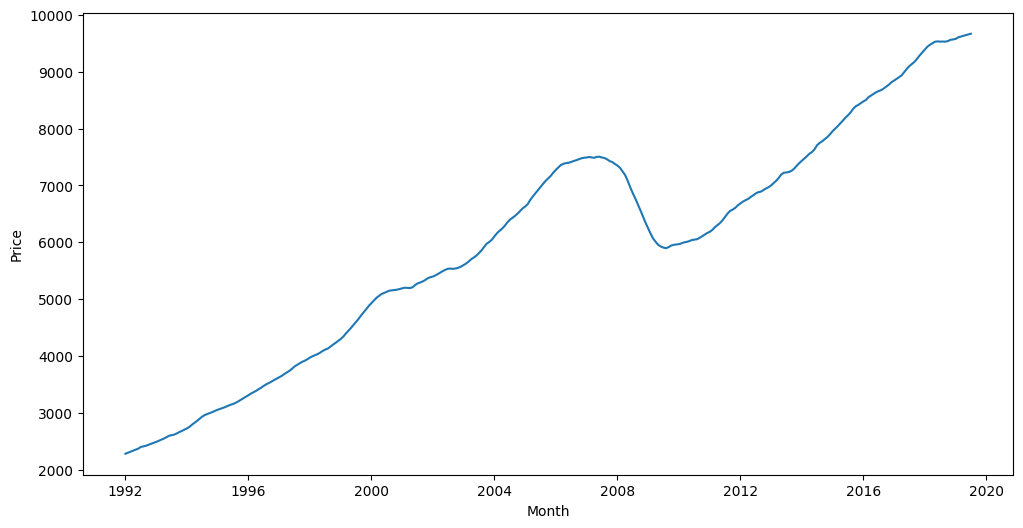

In [161]:
plt.figure(figsize=(12, 6))
plt.plot(seasonal_descompose.trend)
plt.xlabel('Month')
plt.ylabel('Price');

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

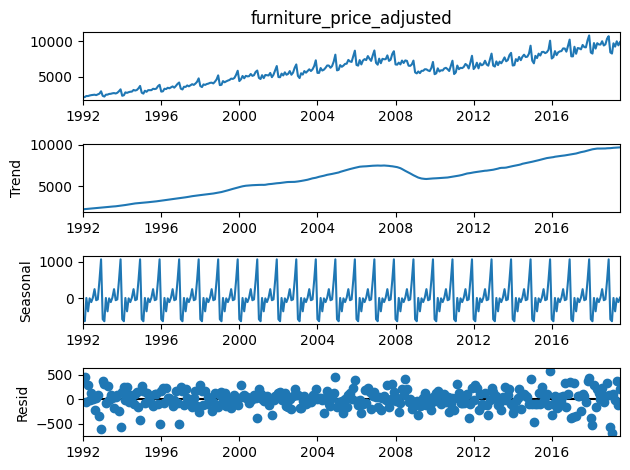

In [162]:
seasonal_descompose.plot();

In [163]:
result = seasonal_decompose(df['furniture_price_adjusted'],
                                model = 'multiplicative',
                                extrapolate_trend = 'freq')

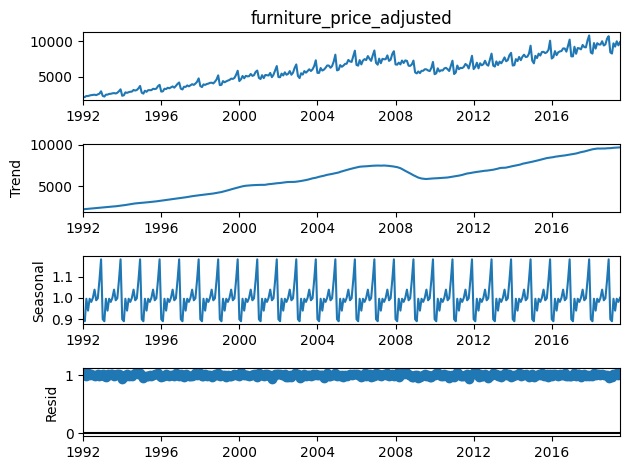

In [164]:
result.plot();

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

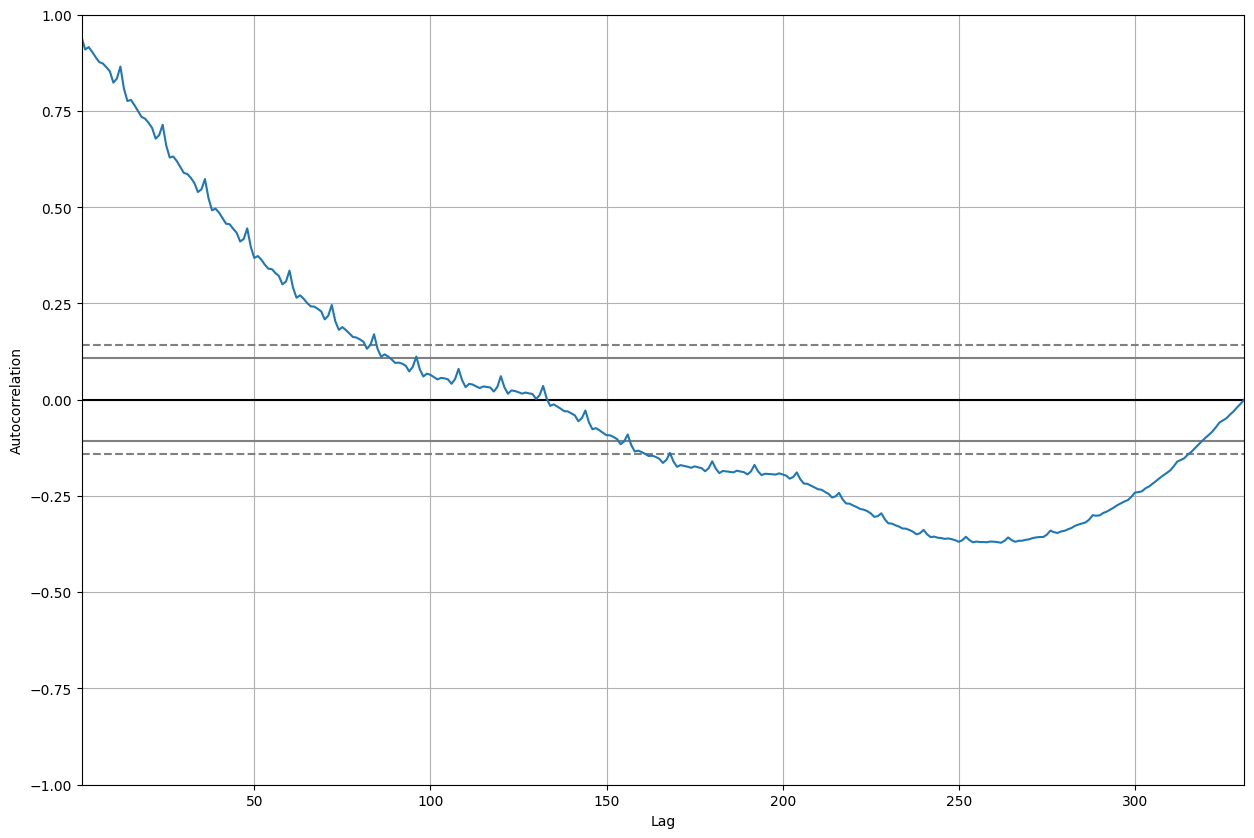

In [165]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(15,10))
autocorrelation_plot(df['furniture_price_adjusted']);

## 9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuestralo mediante una matriz de correlación.

In [145]:
for i in range(1, 6):
    df['t-' + str(i)] = df['furniture_price_adjusted'].shift(i)

df.dropna(inplace=True)
df

,furniture_price_adjusted,t-1,t-2,t-3,t-4,t-5
Month,,,,,,
1992-06-01,2384.638567,2331.414618,2255.103236,2260.570891,2114.485812,2073.432724
1992-07-01,2417.165376,2384.638567,2331.414618,2255.103236,2260.570891,2114.485812
1992-08-01,2445.498729,2417.165376,2384.638567,2331.414618,2255.103236,2260.570891
1992-09-01,2387.351705,2445.498729,2417.165376,2384.638567,2331.414618,2255.103236
1992-10-01,2489.350838,2387.351705,2445.498729,2417.165376,2384.638567,2331.414618
...,...,...,...,...,...,...
2019-03-01,9718.107698,8271.237355,8431.965334,10726.595075,10380.194097,9569.037851
2019-04-01,9248.814254,9718.107698,8271.237355,8431.965334,10726.595075,10380.194097
2019-05-01,10001.305304,9248.814254,9718.107698,8271.237355,8431.965334,10726.595075


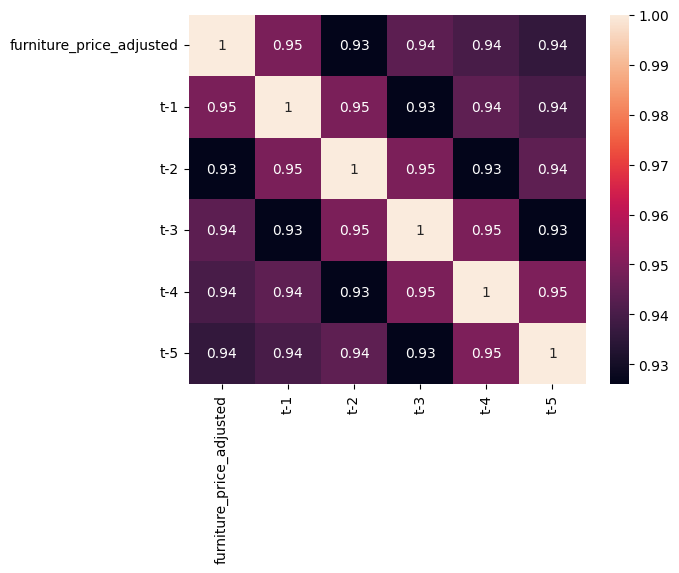

In [146]:
sns.heatmap(df.corr(), annot=True);

## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [169]:
df['detrend_values'] = df['furniture_price_adjusted'] - seasonal_descompose.trend
df

,furniture_price_adjusted,t-5,t-4,t-3,t-2,t-1,detrend_values
Month,,,,,,,
1992-06-01,2384.638567,2073.432724,2114.485812,2260.570891,2255.103236,2331.414618,14.105948
1992-07-01,2417.165376,2114.485812,2260.570891,2255.103236,2331.414618,2384.638567,17.872224
1992-08-01,2445.498729,2260.570891,2255.103236,2331.414618,2384.638567,2417.165376,34.545624
1992-09-01,2387.351705,2255.103236,2331.414618,2384.638567,2417.165376,2445.498729,-34.321270
1992-10-01,2489.350838,2331.414618,2384.638567,2417.165376,2445.498729,2387.351705,51.376787
...,...,...,...,...,...,...,...
2019-03-01,9718.107698,9569.037851,10380.194097,10726.595075,8431.965334,8271.237355,101.098007
2019-04-01,9248.814254,10380.194097,10726.595075,8431.965334,8271.237355,9718.107698,-380.821760
2019-05-01,10001.305304,10726.595075,8431.965334,8271.237355,9718.107698,9248.814254,359.042967


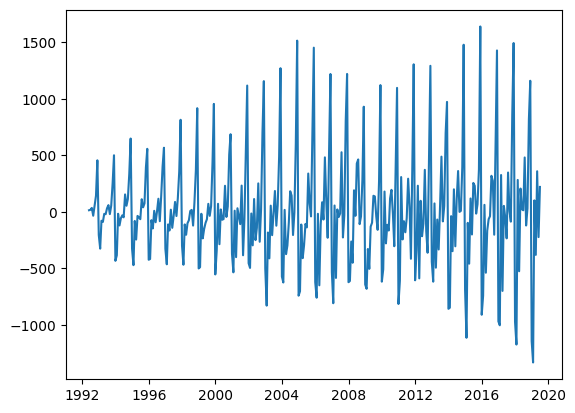

In [170]:
plt.plot(df['detrend_values'])